# **Third week examples** - Cayetano Soneira

### **Pull and z-score**

In [82]:
N <- 1e6
x <- rpois(N,1.7)

pval <- sum(x>=5)/N
sig <- qnorm(pval,lower.tail=F)

cat("Our p-value of",pval,"corresponds to the ",sig,"sigma for a normal distribution.\n")

Our p-value of 0.029573 corresponds to the  1.887107 sigma for a normal distribution.


### We have a counting experiment driven by a Poisson law. How good is the common practice to define the error as 𝑁 (confidence interval N െ 𝑁, 𝑁 ൅ 𝑁 ). Study the coverage as a function of the expected mean.

In [83]:
# 1. Set lambda
lambda = 10
# 2. Draw n as Pois(lambda)
N = 1e4 #Number of random numbers
x <- rpois(N,lambda)

# 3. Calculate confidence interval (n-sqrt(n),n+sqrt(n)) if CL (confidence level) = 68%
low = N - sqrt(N)
upp = N + sqrt(N)

# 4. Is lambda inside? See in how many simulations lambda is inside this interval. This is the coverage
#test = ifelse( < low,0, ifelse(x > upp, 0,1))

test = ifelse( abs(lambda -x) < sqrt(x), 1 ,0)

sum(test)/N

[1] 0.6329

In an alternative way, we could see the coverage against the lambda.

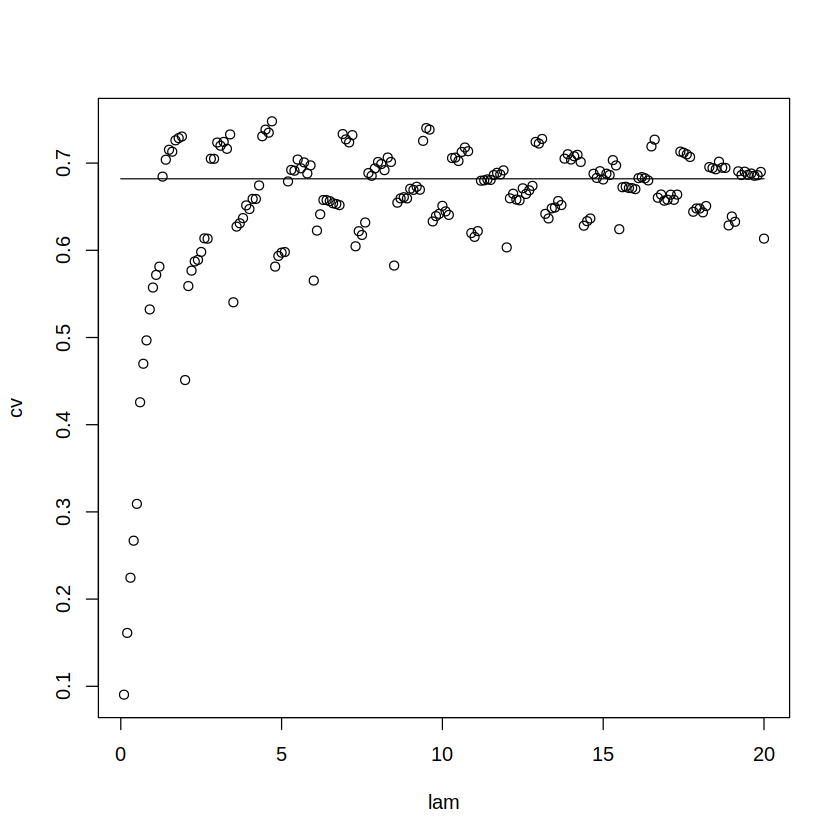

In [87]:
N = 1e4 #Number of random numbers

lam = seq(0.1,20,0.1)
m = length(lam)
cv = numeric(m)

for (i in 1:m){
    x <- rpois(N,lam[i])
    test = ifelse( abs(lam[i] -x) < sqrt(x), 1 ,0)
    cv[i] = sum(test)/N
}

plot(lam,cv)
lines(c(0,20),c(0.682,0.682))

### Having a small sample of say 10 elements, following N(,1) we do a KS test against N(0,1) with a CL of 95% or 99%, do we really fail 1- CL when ? How often we correctly reject >0 as a function of ?


	Exact two-sample Kolmogorov-Smirnov test

data:  x and y
D = 1, p-value = 1.083e-05
alternative hypothesis: two-sided


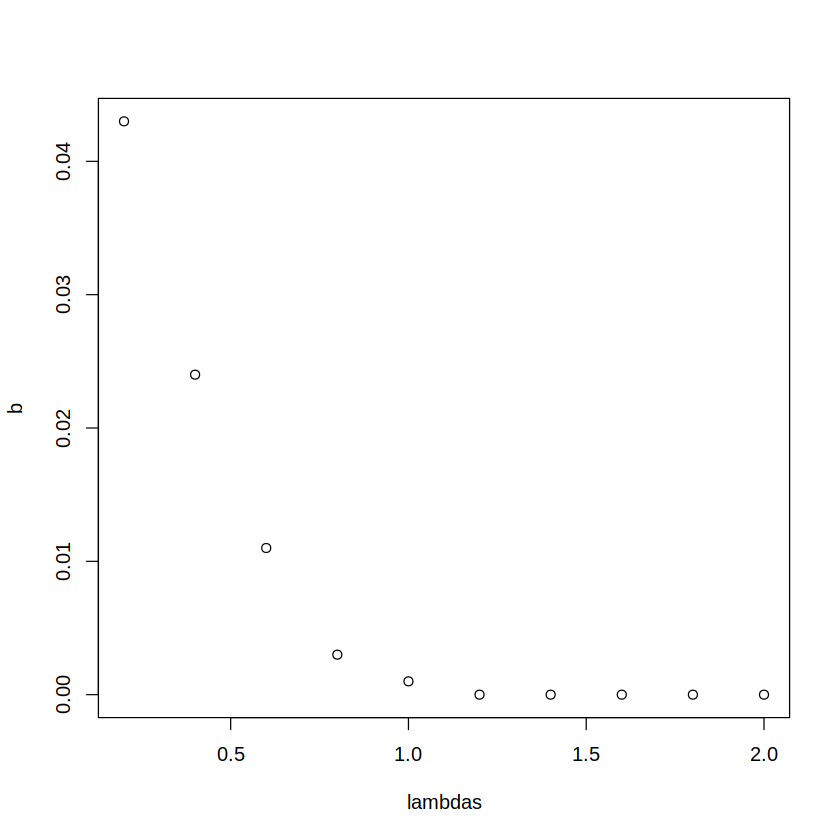

In [107]:
N = 1e3
M = 10
a = numeric(N)

mu = 2

ks.test(x,y)

lambdas <- seq(0.2,2,0.2)
b <- numeric(length(lambdas))
CL <- 0.95

j <- 1
for (l in lambdas){
    for (i in 1:N){
        x <- rnorm(M,l,1)
        t <- ks.test(x, "pnorm");
        a[i] <- t$p.value
        }
    b[j] <- sum(a>CL)/N
    j <- j+1
}

plot(lambdas,b)

### Notes
- **POI**: parameter of interest
- **pull**: a jargon name for the $$\frac{measurement-expectation}{error}.$$ We use this thing because if the case is gaussian it becomes automatically the *z-score*, which is literally the number of *gaussian sigmas*, i.e., if $\textrm{pull} = 3$ it implies the measurement is a $3\sigma$.
- **The usual method of discovery:** we do an experiment, which gives a certain data.
  - **KP model**: *known physics* model. A **discovery** is accepted when the comparison of the data with the known physics model gives a **very small p-value**.
  - **NP model**: *new physics* model. The rejectance of a model for new physics, called **exclusion**, is done when the comparison of the data with the new physics model gives a **small p-value** (not necessary a very small one, since the new model is in principle more unlikely).
- **Counting experiment**: every experiment that has as outcome just a natural number.
- **The steps in the plot in the question about the coverage of the n +- sqrt(n) come because it is a discrete dsitribution and are very common to those cases.**